In [46]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
import tensorflow as tf

In [3]:
tourism_rating=pd.read_excel('tourism_rating.xlsx') 
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10140 entries, 0 to 10139
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        10140 non-null  int64 
 1   Place_Id       10140 non-null  int64 
 2   Place_Ratings  10140 non-null  object
dtypes: int64(2), object(1)
memory usage: 237.8+ KB


In [4]:
tourism_data=pd.read_excel('Dataset_tourism.xlsx') 
tourism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     576 non-null    int64  
 1   Place_Name   576 non-null    object 
 2   Description  576 non-null    object 
 3   City         576 non-null    object 
 4   Category     576 non-null    object 
 5   Price        576 non-null    int64  
 6   Lat          576 non-null    float64
 7   Long         576 non-null    float64
 8   Rating       576 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 40.6+ KB


In [11]:
tourism_user=pd.read_csv('User Tourism Dataset.csv', sep =';') 
tourism_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1000 non-null   int64 
 1   username           1000 non-null   object
 2   firstname          1000 non-null   object
 3   lastname           1000 non-null   object
 4   gender             1000 non-null   object
 5   email              1000 non-null   object
 6   city               1000 non-null   object
 7   categorydestinasi  999 non-null    object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [13]:
tourism_reviewer=pd.read_excel('Reviewer.xlsx') 
tourism_reviewer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Category   100 non-null    object 
 1   Name       100 non-null    object 
 2   City       100 non-null    object 
 3   Rating     100 non-null    float64
 4   Review     100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


# Preprocessing

In [41]:
#Change tourism_rating data type
tourism_rating['Place_Ratings'] = pd.to_numeric(tourism_rating['Place_Ratings'], errors='coerce')
tourism_rating.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10140 entries, 0 to 10139
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        10140 non-null  int64  
 1   Place_Id       10140 non-null  int64  
 2   Place_Ratings  10009 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 237.8 KB


Check Missing Value

In [16]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [17]:
tourism_data.isnull().sum()

Place_Id       0
Place_Name     0
Description    0
City           0
Category       0
Price          0
Lat            0
Long           0
Rating         0
dtype: int64

In [18]:
tourism_reviewer.isnull().sum()

Category     0
Name         0
City         0
Rating       0
Review       0
dtype: int64

Check Data Duplicate

In [19]:
duplicate = tourism_data[tourism_data.duplicated(subset=['Place_Name','City'])]

if duplicate.empty:
    print("No duplicate")
else:
    print("Duplicate")
    print(duplicate)

Duplicate
     Place_Id                Place_Name  \
61        488            Pantai Natsepa   
268       585            Taman Suropati   
469       545        Keraton Yogyakarta   
473       569   Taman Pintar Yogyakarta   
521       514  Bukit Bintang Yogyakarta   
525       579           Museum Nasional   
545       519           Candi Prambanan   
546       534             Gunung Merapi   
552       583             Dunia Fantasi   
564       529          Gembira Loka Zoo   
570       586      Grand Indonesia Mall   
575       512           Ancol Dreamland   

                                           Description        City  \
61   Bersantai di Pantai Natsepa, pantai dengan air...       Ambon   
268  Bersantai di Taman Suropati yang hijau dan dam...     Jakarta   
469  Kunjungi Keraton Yogyakarta, istana tradisiona...  Yogyakarta   
473  Tempat edukasi dan hiburan, Taman Pintar Yogya...  Yogyakarta   
521  Menyaksikan Yogyakarta dari ketinggian di Buki...  Yogyakarta   
525  Menel

In [20]:
tourism_data = tourism_data.drop_duplicates(subset=['Place_Name','City'], keep='first')
tourism_data

,Place_Id,Place_Name,Description,City,Category,Price,Lat,Long,Rating
0,29,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Jakarta,Pusat Perbelanjaan,0,-6.166789,106.826526,5.0
1,69,Freedom Library,Freedom Library adalah perpustakaan buku yang ...,Jakarta,Budaya,0,-6.202248,106.845197,5.0
2,95,Desa Wisata Sungai Code Jogja Kota,"Kampung Code berada di Kelurahan Kotabaru, Kec...",Yogyakarta,Taman Hiburan,0,-7.822909,110.375689,5.0
3,124,Kauman Pakualaman Yogyakarta,Pakualaman adalah sebuah kecamatan di Kota Yog...,Yogyakarta,Budaya,0,-7.801035,110.375192,5.0
4,278,Masjid Daarut Tauhiid Bandung,pada bulan Juli 1993 berdirilah sebuah masjid ...,Bandung,Tempat Ibadah,0,-6.863527,107.589919,4.9
...,...,...,...,...,...,...,...,...,...
569,580,Kota Tua Jakarta,"Jelajahi Kota Tua Jakarta, area bersejarah den...",Jakarta,Budaya,14000,-6.135000,106.813300,3.7
571,592,Summarecon Mall Serpong,Berbelanja dan bersantap di Summarecon Mall Se...,Tangerang,Pusat Perbelanjaan,13000,-6.242000,106.627300,3.7
572,515,Bukit Cinta,Menikmati pemandangan matahari terbenam yang r...,Magelang,Taman Hiburan,8000,-7.510600,110.227200,3.5
573,573,Tebing Keraton,Trekking menuju Tebing Keraton dengan pemandan...,Bandung,Taman Hiburan,12000,-6.752800,107.612700,3.5


Data Visualization

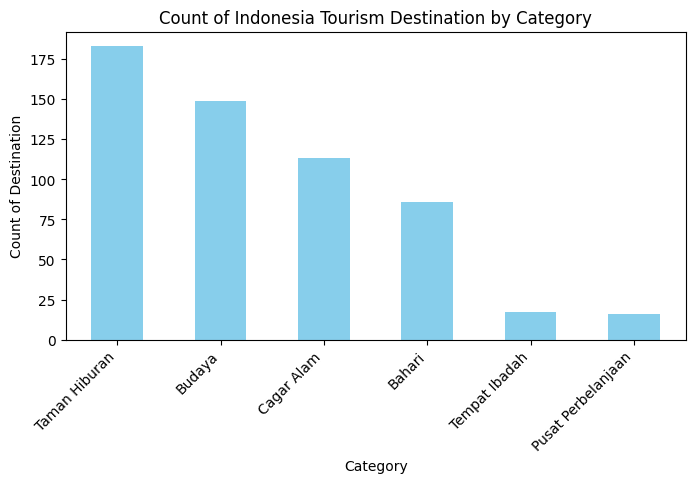

In [24]:
category_counts = tourism_data['Category'].value_counts()

# Bar chart use matplotlib
plt.figure(figsize=(8, 4))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Indonesia Tourism Destination by Category')
plt.xlabel('Category')
plt.ylabel('Count of Destination')
plt.xticks(rotation=45, ha='right') 
plt.show()


# Travel Buddy Recommendations

In [31]:
# Select a user and specify city and category preferences
user_id = 1  # Replace with the appropriate user
city_preference = tourism_user[tourism_user['id'] == user_id]['city'].values[0]
category_preference = tourism_user[tourism_user['id'] == user_id]['categorydestinasi'].values[0]

# Filter travel buddies based on city preference
travel_buddies_city = tourism_user[
    (tourism_user['city'] == city_preference) &
    (tourism_user['id'] != user_id)  # Avoid recommending oneself
]

# Filter travel buddies based on category preference
travel_buddies_category = tourism_user[
    (tourism_user['categorydestinasi'] == category_preference) &
    (tourism_user['id'] != user_id)  # Avoid recommending oneself
]

# Filter travel buddies based on both city and category preferences
travel_buddies = tourism_user[
    (tourism_user['city'] == city_preference) &
    (tourism_user['categorydestinasi'] == category_preference) &
    (tourism_user['id'] != user_id)  # Avoid recommending oneself
]


In [32]:
# Recommendation Based on User's Hometown

print("Travel Buddy Recommendations Based on Hometown:")
print(travel_buddies_city[['id', 'username', 'city', 'categorydestinasi']])


Travel Buddy Recommendations Based on Hometown:
      id   username      city   categorydestinasi
2      3     Ahmad3  Surabaya  Pusat Perbelanjaan
4      5      Joko5  Surabaya       Tempat Ibadah
8      9      Rudi9  Surabaya       Taman Hiburan
10    11      Eko11  Surabaya             Budaya 
12    13    Fajar13  Surabaya       Taman Hiburan
14    15  Bambang15  Surabaya  Pusat Perbelanjaan
16    17     Joko17  Surabaya       Tempat Ibadah
18    19     Andi19  Surabaya             Budaya 
48    49    Hiram49  Surabaya       Perbelanjaan 
49    50   Corrie50  Surabaya       Tempat Ibadah
50    51    Anita51  Surabaya       Taman Hiburan
51    52    Ricky52  Surabaya       Taman Hiburan
52    53     Maya53  Surabaya          Cagar Alam
540  541  Dorice541  Surabaya             Budaya 
541  542    Davy542  Surabaya       Perbelanjaan 
542  543  Lenard543  Surabaya       Tempat Ibadah
543  544    Bret544  Surabaya       Taman Hiburan
544  545  Dallis545  Surabaya       Taman Hiburan
98

In [33]:
# Recommendation Based on User's Category Destination Preferences

print("Travel Buddy Recommendations Based on Destination Category Preferences:")
print(travel_buddies_category[['id', 'username', 'city', 'categorydestinasi']])


Travel Buddy Recommendations Based on Destination Category Preferences:
       id       username           city categorydestinasi
8       9          Rudi9       Surabaya     Taman Hiburan
12     13        Fajar13       Surabaya     Taman Hiburan
19     20         Dian20         Malang     Taman Hiburan
23     24          Nur24  Bangka Barat      Taman Hiburan
30     31          Edi31     Bantaeng       Taman Hiburan
..    ...            ...            ...               ...
979   980      Dallon980      Ternate       Taman Hiburan
983   984    Aridatha984         Tual       Taman Hiburan
990   991       Gibby991     Semarang       Taman Hiburan
991   992         Lil992           Solo     Taman Hiburan
999  1000  Corrianne1000       Malang       Taman Hiburan

[213 rows x 4 columns]


In [34]:
# Recommendation Based on User's Hometown and User's Category Destination Preferences

print("Travel Buddy Recommendations:")
print(travel_buddies[['id', 'username', 'city', 'categorydestinasi']])

Travel Buddy Recommendations:
      id   username      city categorydestinasi
8      9      Rudi9  Surabaya     Taman Hiburan
12    13    Fajar13  Surabaya     Taman Hiburan
50    51    Anita51  Surabaya     Taman Hiburan
51    52    Ricky52  Surabaya     Taman Hiburan
543  544    Bret544  Surabaya     Taman Hiburan
544  545  Dallis545  Surabaya     Taman Hiburan


In [39]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10140 entries, 0 to 10139
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        10140 non-null  int64 
 1   Place_Id       10140 non-null  int64 
 2   Place_Ratings  10140 non-null  object
dtypes: int64(2), object(1)
memory usage: 237.8+ KB


In [50]:
# Recommendations based on user's travel preferences similarity

# User-item matrix for tourism destinations
user_item_matrix = pd.pivot_table(tourism_rating, values='Place_Ratings', index='User_Id', columns='Place_Id', fill_value=0)

# User ID for whom travel buddies will be recommended
user_id = 1  # Replace with the desired user ID

# Extract destinations visited by the selected user
visited_destinations = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index

# Extract ratings matrix only for the visited destinations
user_item_matrix_subset = user_item_matrix[visited_destinations]

# Subsetting user_item_matrix to include only common items
user_item_matrix_selected = user_item_matrix[visited_destinations]

# Calculate cosine similarity between the selected user and other users
similarity_scores = cosine_similarity(user_item_matrix_selected.loc[[user_id]], user_item_matrix_subset)

# Get users with the highest similarity scores
similar_users = list(similarity_scores[0].argsort()[-2:-7:-1])

# Display recommended travel buddies
recommended_buddies = tourism_user[tourism_user['id'].isin(similar_users)]
print("Recommended Travel Buddies:")
print(recommended_buddies[['id', 'username']])


Recommended Travel Buddies:
      id    username
61    62      Sari62
94    95    Artair95
102  103     Neil103
198  199   Agatha199
202  203  Fabiano203
